# Tarea 6

**Envío del PR inicial:** Sábado, 3 de noviembre

**Aceptación del PR:** Viernes 9 de noviembre

**NOTA:** Esta tarea debe entregarse en equipo.

# 1

- ¿Cómo se generaliza la expresión anterior para el exponente de Lyapunov en mapeos de 1 variable, a mapeos de 2 variables?


- ¿Cómo se compara el exponente de Lyapunov $\lambda(x_0)$ con $\lambda( f(x_0) )$, para el mapeo $x\mapsto f(x)$?

# 2

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el diagrama que muestra el exponente de Lyapunov en términos de $c$, para $c\in[-2,2]$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

In [12]:
using TaylorSeries, Plots, Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/411932bbeb63c1e811d5d3c4add71783ae1eeaa7-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/411932bbeb63c1e811d5d3c4add71783ae1eeaa7-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [1]:
include("Mapeos.jl")
using Mapeos

In [13]:
pyplot()

Plots.PyPlotBackend()

In [3]:
function calcula_lyapunov(f, x0, n=1000)
    x = x0
    t = Taylor1(eltype(x0), 1)
    suma = 0
    for i in 1:n
        xi = f(x)
        der = f(t + xi).coeffs[2]
        suma += log(abs(der))
        x = xi
    end
    suma / n
end

calcula_lyapunov (generic function with 2 methods)

In [4]:
Qc(x, c) = x^2 + c

Qc (generic function with 1 method)

In [6]:
rango_c = -2:1e-4:2
coefs_lyapunov = []
x0 = 0.
for c in rango_c
    ff = x -> Qc(x, c)
    push!(coefs_lyapunov, calcula_lyapunov(ff, x0))
end

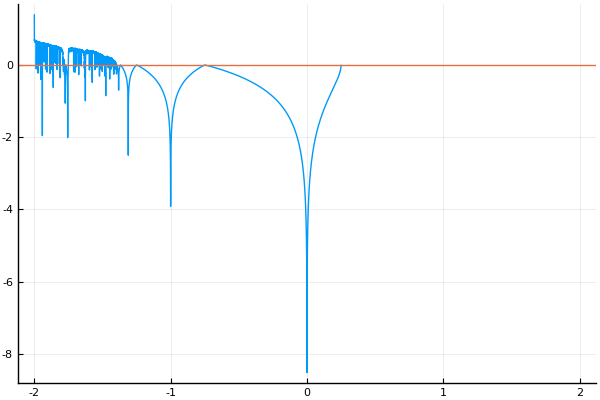

In [7]:
plot(rango_c, coefs_lyapunov, label="")
hline!([0], label="")

# 3

Rehacer los cálculos de los exponentes de Feigenbaum,
\begin{eqnarray*}
f_n &=& \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}},\\
a_n &=& \frac{d_n}{d_{n+1}},
\end{eqnarray*}

usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la `Tarea4`.) 

Nota: Es importante dar un punto suficientemente bien aproximado a $C_n$ para que el método de Newton converja bien.

In [5]:
function Qcⁿ(x, args)
    c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc(x,c)
    for it = 1:n
        x = Qc(x,c)
    end
    return x
end

Qcⁿ (generic function with 1 method)

In [6]:
function roots_newton(f, x0; n=1000)
    t = Taylor1(eltype(x0), 1)
    for ind = 1:n
       fT = f(x0+t)
       x0 = x0 - fT[0]/fT[1]
    end
    x0
end

roots_newton (generic function with 1 method)

# 4

Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$. 


Veamos cómo se comportan estos mapeos para estos valores de $C$.
A continuación se muestran pares de gráficas, a la izquierda de cada par está $Q_c(x)$ y a la derecha $Q^2_{c\prime}(x)$.

In [7]:
p₊(c) = (1 + sqrt(1 - 4c)) / 2
p₋(c) = (1 - sqrt(1 - 4c)) / 2

p₋ (generic function with 1 method)

c = 0.25
c′ = -0.75


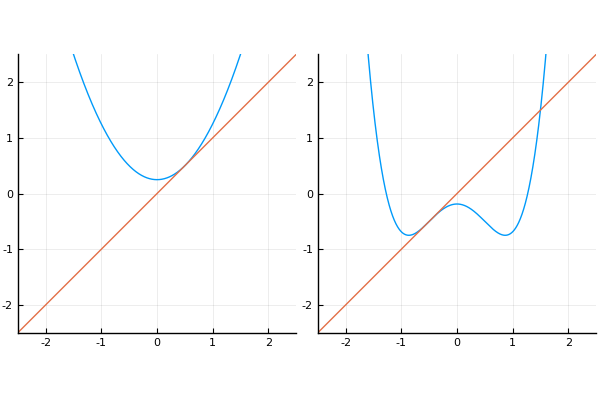

In [35]:
δ = 2
c = 1/4
c′ = -3/4
pm = p₊(c)
x_range = linspace(-(pm + δ), pm + δ, 1000)
Q = x -> Qcⁿ(x, (c, 1))
Q2 = x -> Qcⁿ(x, (c′, 2))
p1 = plot(x_range, Q, legend=false, ratio=:equal)
plot!(p1, x -> x)
xlims!(p1, -(pm + δ), pm + δ)
ylims!(p1, -(pm + δ), pm + δ)
p2 = plot(x_range, Q2, legend=false, ratio=:equal)
plot!(p2, x -> x)
xlims!(p2, -(pm + δ), pm + δ)
ylims!(p2, -(pm + δ), pm + δ)
@show c; @show c′
plot(p1, p2, layout=(1, 2))

c = 0.0
c′ = -1


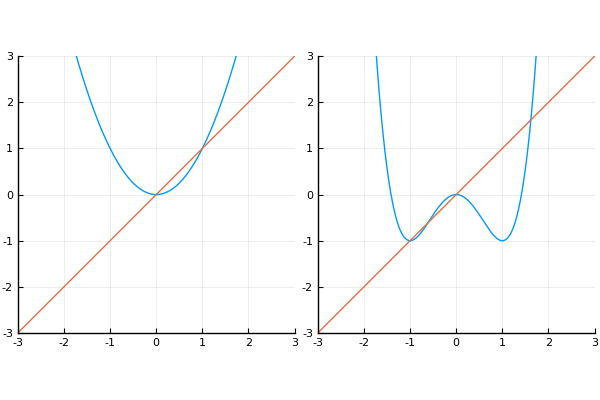

In [36]:
δ = 2
c = 0.
c′ = -1
pm = p₊(c)
x_range = linspace(-(pm + δ), pm + δ, 1000)
Q = x -> Qcⁿ(x, (c, 1))
Q2 = x -> Qcⁿ(x, (c′, 2))
p1 = plot(x_range, Q, legend=false, ratio=:equal)
plot!(p1, x -> x)
xlims!(p1, -(pm + δ), pm + δ)
ylims!(p1, -(pm + δ), pm + δ)
p2 = plot(x_range, Q2, legend=false, ratio=:equal)
plot!(p2, x -> x)
xlims!(p2, -(pm + δ), pm + δ)
ylims!(p2, -(pm + δ), pm + δ)
@show c; @show c′
plot(p1, p2, layout=(1, 2))

c = -0.75
c′ = -1.25


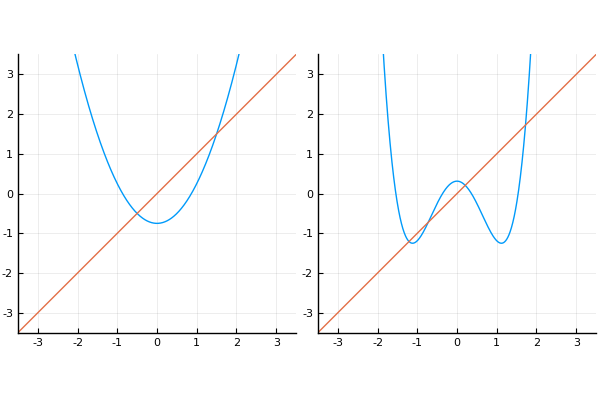

In [34]:
δ = 2
c = -3/4
c′ = -5/4
pm = p₊(c)
x_range = linspace(-(pm + δ), pm + δ, 1000)
Q = x -> Qcⁿ(x, (c, 1))
Q2 = x -> Qcⁿ(x, (c′, 2))
p1 = plot(x_range, Q, legend=false, ratio=:equal)
plot!(p1, x -> x)
xlims!(p1, -(pm + δ), pm + δ)
ylims!(p1, -(pm + δ), pm + δ)
p2 = plot(x_range, Q2, legend=false, ratio=:equal)
plot!(p2, x -> x)
xlims!(p2, -(pm + δ), pm + δ)
ylims!(p2, -(pm + δ), pm + δ)
@show c; @show c′
plot(p1, p2, layout=(1, 2))

c = -1.0
c′ = -1.3


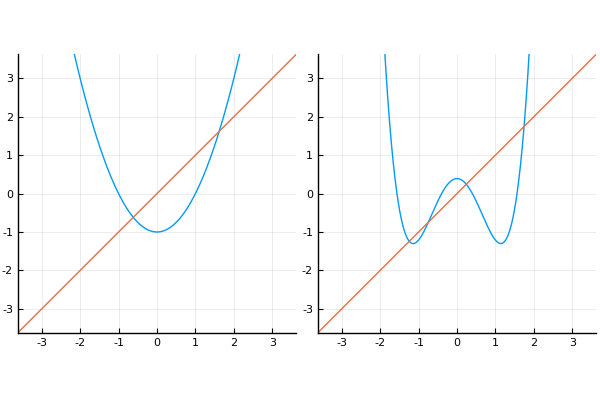

In [37]:
δ = 2
c = -1.
c′ = -1.3
pm = p₊(c)
x_range = linspace(-(pm + δ), pm + δ, 1000)
Q = x -> Qcⁿ(x, (c, 1))
Q2 = x -> Qcⁿ(x, (c′, 2))
p1 = plot(x_range, Q, legend=false, ratio=:equal)
plot!(p1, x -> x)
xlims!(p1, -(pm + δ), pm + δ)
ylims!(p1, -(pm + δ), pm + δ)
p2 = plot(x_range, Q2, legend=false, ratio=:equal)
plot!(p2, x -> x)
xlims!(p2, -(pm + δ), pm + δ)
ylims!(p2, -(pm + δ), pm + δ)
@show c; @show c′
plot(p1, p2, layout=(1, 2))

c = -2.0
c′ = -1.546


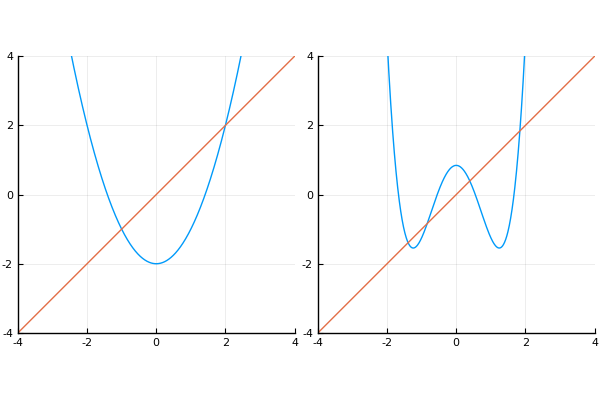

In [38]:
δ = 2
c = -2.
c′ = -1.546
pm = p₊(c)
x_range = linspace(-(pm + δ), pm + δ, 1000)
Q = x -> Qcⁿ(x, (c, 1))
Q2 = x -> Qcⁿ(x, (c′, 2))
p1 = plot(x_range, Q, legend=false, ratio=:equal)
plot!(p1, x -> x)
xlims!(p1, -(pm + δ), pm + δ)
ylims!(p1, -(pm + δ), pm + δ)
p2 = plot(x_range, Q2, legend=false, ratio=:equal)
plot!(p2, x -> x)
xlims!(p2, -(pm + δ), pm + δ)
ylims!(p2, -(pm + δ), pm + δ)
@show c; @show c′
plot(p1, p2, layout=(1, 2))

c = -2.2
c′ = -1.65


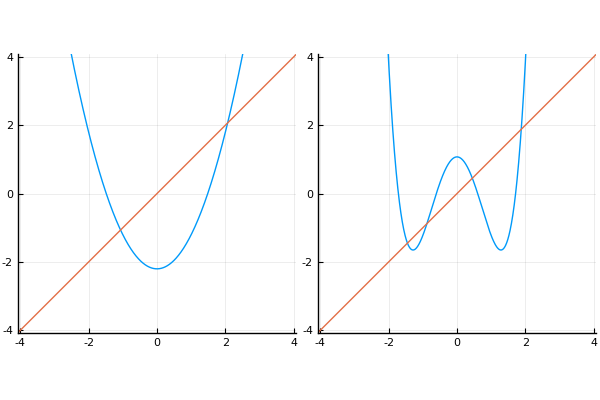

In [39]:
δ = 2
c = -2.2
c′ = -1.65
pm = p₊(c)
x_range = linspace(-(pm + δ), pm + δ, 1000)
Q = x -> Qcⁿ(x, (c, 1))
Q2 = x -> Qcⁿ(x, (c′, 2))
p1 = plot(x_range, Q, legend=false, ratio=:equal)
plot!(p1, x -> x)
xlims!(p1, -(pm + δ), pm + δ)
ylims!(p1, -(pm + δ), pm + δ)
p2 = plot(x_range, Q2, legend=false, ratio=:equal)
plot!(p2, x -> x)
xlims!(p2, -(pm + δ), pm + δ)
ylims!(p2, -(pm + δ), pm + δ)
@show c; @show c′
plot(p1, p2, layout=(1, 2))

De lo anterior notamos que hay regiones en la grafica del mapeo $Q^2_{c\prime}(x)$ que se asemeja mucho al de $Q_c(x)$. Esto es el principio de lo que se conoce como teoría de renormalización.

# 5

Estudiar la dinámica para $c=-2.2$

- ¿Cómo se caracteriza el valor al que tiende *casi* cualquier condición inicial en el
intervalo $I=[-p_+,p_+]$ (donde $p_+$ es el valor positivo tal que $Q_c(p_+)=p_+$), después de muchos iterados? (El intervalo $I$ es donde "toda la dinámica interesante ocurre".)

- Caractericen los subconjuntos de $I$ tales que, después de $n=1,2,3,\dots$ iterados de $Q_c(x)$, su intersección con $I$ es vacía.

- Caracterizen al complemento del conjunto de los casos anteriores, es decir, cuando los iterados de la condición inicial **no** llegan a donde *casi* cualquier condición inicial termina. ¿Cómo se conoce a este conjunto?

p₊ (generic function with 1 method)

In [9]:
pm = p₊(-2.2)

2.0652475842498528

In [10]:
q1 = (x, c) -> Qcⁿ(x, (c, 1))

(::#1) (generic function with 1 method)

Grafiquemos el mapeo $Q_c$ para $c=2.2$

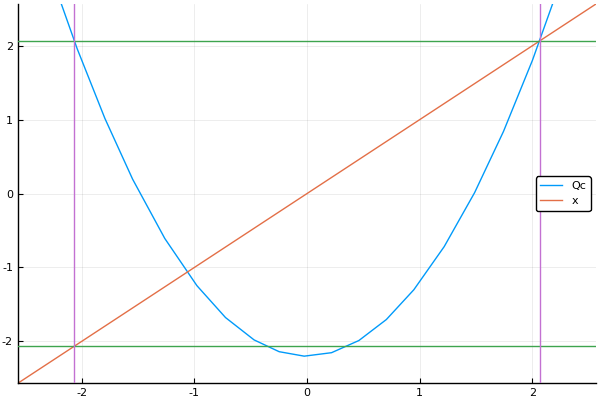

In [11]:
plot(x -> q1(x, -2.2), label="Qc")
plot!(x -> x, label="x")
hline!([pm, -pm], label="")
vline!([pm, -pm], label="")
xlims!(-pm-0.5, pm+0.5); ylims!(-pm-0.5, pm+0.5)

Entonces, el rango de interés es

In [65]:
I = -pm:1e-6:pm

-2.0652475842498528:1.0e-6:2.065247415750147

In [ ]:
c = -2.2
mapeos = [Mapeo(x -> q1(x, c), x0, 100) for x0 in I];

In [62]:
for m in mapeos
    if !m.div
        print("no diverge")
    end
end

De lo anterior nos damos cuenta que todos los mapeos en el intervalo $I$ se van a infinito.
Veamos la dinñamica de varios de estos puntos en el cuadrado mostrado anteriormente.

In [63]:
xs = []
colores = []
for m in mapeos
    push!(xs, m.x₀)
    push!(colores, Int(find(isfinite, m.xnn)[end]))
end

In [64]:
colores[colores.==2]

0-element Array{Any,1}

In [53]:
@manipulate for i in 1:100
    any(colores.==i)
    end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_02", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-b712b0aa-ed12-4c9e-9cd0-09bf977b06de", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 100),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_01", 50, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/uzielnmtz/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":50}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(functio

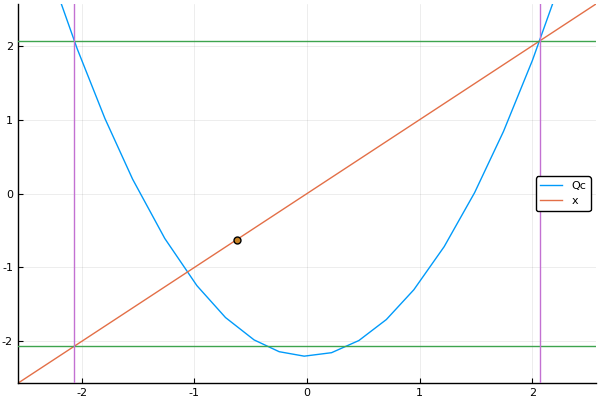

In [58]:
plot(x -> q1(x, -2.2), label="Qc")
plot!(x -> x, label="x")
hline!([pm, -pm], label="")
vline!([pm, -pm], label="")
xlims!(-pm-0.5, pm+0.5); ylims!(-pm-0.5, pm+0.5)
scatter!(xs[colores.==38], xs[colores.==38], c=colores[colores.==38], ms=5, label="")

In [59]:
xs

414-element Array{Any,1}:
 -2.06525
 -2.05525
 -2.04525
 -2.03525
 -2.02525
 -2.01525
 -2.00525
 -1.99525
 -1.98525
 -1.97525
 -1.96525
 -1.95525
 -1.94525
  ⋮      
  1.95475
  1.96475
  1.97475
  1.98475
  1.99475
  2.00475
  2.01475
  2.02475
  2.03475
  2.04475
  2.05475
  2.06475

# 6

- Usando el análisis gráfico para un valor de $c$ *ligeramente* anterior al punto donde se observa la ventana de periodo 3 para la familia $Q_c(x)$, y uno en la ventana de periodo 3, concluyan el tipo de bifurcación que se observa.

- Comparen la dinámica para ambos valores de $c$ del inciso anterior. ¿Cómo es el exponente de Lyapunov en cada caso?

- Encuentren el valor de $c$ donde se da el ciclo superestable de periodo 3. (Nuevamente, usen el método de Newton con una buena semilla inicial para $c$.) Demuestren que para este valor de $c$ el mapeo $Q_c^3(x)$ tiene *ocho* puntos fijos, donde dos de ellos son puntos fijos de $Q_c(x)$, y los otros 6 forman dos secuencias periódicas, de periodo 3 en $Q_c(x)$, una de ellas estable y la otra inestable.

(Los siguientes incisos usan el valor de $c$ encontrado en el inciso anterior.)

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

(Los intervalos $I_0$ e $I_1$, y estas propiedades, son básicos en la demostración del teorema "periodo tres implica caos".)

Recordemos el diagrama de órbita para este mapeo.

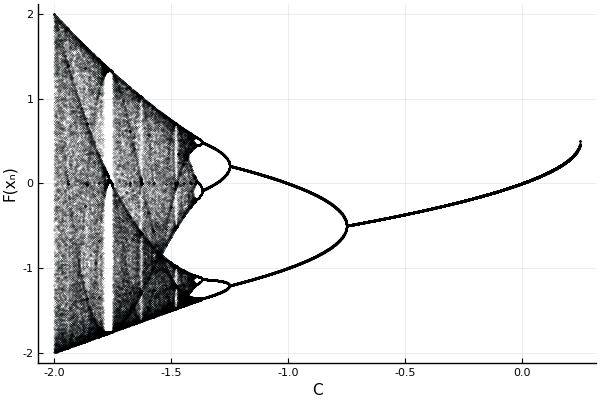

In [14]:
rango_c = -2:0.001:1/4
Fs = [x -> Qc(x, c) for c in rango_c];

x₀ = 0.0
mapeos = [Mapeo(F, x₀, 1000) for F in Fs];

# se va a tomar los últimos 101 puntos de cada mapeo
ps = [m.xnn[end-100:end] for m in mapeos];

cs = []
for c in rango_c
    for i in 1:101
        push!(cs, c)
    end
end

xn = []
for p in ps
    for x in p
        push!(xn, x)
    end
end

p = scatter(cs, xn, ms=.1, legend=false)
xlabel!("C")
ylabel!("F(xₙ)")

De la grafica anterior es sencillo buscar el valor para $c$ en dónde se da la ventana de periodo 3, esto es aproximadamente para $c\approx-1.75$, veamos.

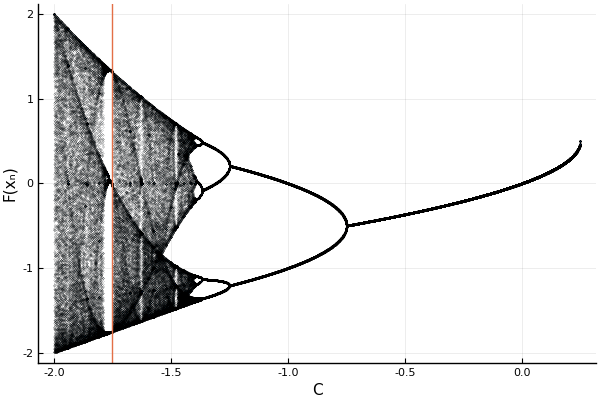

In [15]:
rango_c = -2:0.001:1/4
Fs = [x -> Qc(x, c) for c in rango_c];

x₀ = 0.0
mapeos = [Mapeo(F, x₀, 1000) for F in Fs];

# se va a tomar los últimos 101 puntos de cada mapeo
ps = [m.xnn[end-100:end] for m in mapeos];

cs = []
for c in rango_c
    for i in 1:101
        push!(cs, c)
    end
end

xn = []
for p in ps
    for x in p
        push!(xn, x)
    end
end

p = scatter(cs, xn, ms=.1, legend=false)
xlabel!("C")
ylabel!("F(xₙ)")
vline!([-1.755])

Tomemos como $c=-1.755$ el valor al que sucede la ventana de periodo 3.

c = -1.755
c′ = -1.76


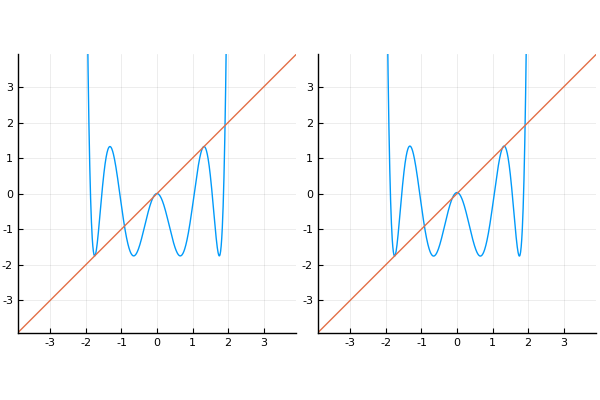

In [16]:
δ = 2
c = -1.755
c′ = -1.76
pm = p₊(c)
x_range = linspace(-(pm + δ), pm + δ, 1000)
Q = x -> Qcⁿ(x, (c, 3))
Q2 = x -> Qcⁿ(x, (c′, 3))
p1 = plot(x_range, Q, legend=false, ratio=:equal)
plot!(p1, x -> x)
xlims!(p1, -(pm + δ), pm + δ)
ylims!(p1, -(pm + δ), pm + δ)
p2 = plot(x_range, Q2, legend=false, ratio=:equal)
plot!(p2, x -> x)
xlims!(p2, -(pm + δ), pm + δ)
ylims!(p2, -(pm + δ), pm + δ)
@show c; @show c′
plot(p1, p2, layout=(1, 2))

La grafica anterior muestra un comportamiento clásico de una bifurcación silla-nodo como las vistas en tareas anteriores.

Veamos cómo se comporta el exponente de Lyapunov en ambos casos.

In [17]:
calcula_lyapunov(x -> Qc(x, c), 0.0)

-1.4506302614716258

In [18]:
calcula_lyapunov(x -> Qc(x, c′), 0.0)

-0.2660123418945636

Ahora encontremos el valor de $c$ donde se da el ciclo superestable de $0$.

In [19]:
q40 = c -> Qcⁿ(0., (c, 3))

(::#50) (generic function with 1 method)

In [20]:
# Usemos como semilla el valor de c=-1.755
c_3 = roots_newton(q40, -1.755)

-1.7548776662466927

Ahora veamos sus puntos fijos, recordemos que la ecuación a resolver es
$$
Q^3_c(x) = x
$$

In [21]:
Q3c = x -> Qcⁿ(x, (c_3, 3))

(::#52) (generic function with 1 method)

In [22]:
x_range = -10:1e-2:10
roots = []
for x0 in x_range
    r = roots_newton(x -> Q3c(x) - x, x0)
    push!(roots, r)
end

In [23]:
roots[abs.(roots) .< 1e-2] = 0 # Esto para filtrar los 0

0

In [69]:
unique(roots)

28-element Array{Real,1}:
 -1.75488 
 -1.74285 
 -1.74285 
  1.91594 
  1.32472 
  0       
 -0.10965 
 -0.10965 
 -0.915937
  1.28266 
 -0.10965 
 -0.10965 
 -0.10965 
  ⋮       
 -0.10965 
 -0.10965 
 -0.10965 
 -0.10965 
 -0.10965 
 -0.10965 
 -0.10965 
 -0.10965 
 -0.10965 
 -0.10965 
 -0.10965 
  1.28266 

In [25]:
# Las dos raíces de Qc son
@show p₊(c_3)
@show p₋(c_3)

p₊(c_3) = 1.9159370276416579
p₋(c_3) = -0.9159370276416579


-0.9159370276416579

De lo anterior vemos que hay 8 raíces distintas. Estos son

In [68]:
fixed_pts = [-1.7548776662466927, -1.7428545378333946, 1.9159370276416579, 1.324717957244746, -0.10965002696442139, 
    -0.9159370276416579, 1.2826642737997627, 0]

8-element Array{Float64,1}:
 -1.75488 
 -1.74285 
  1.91594 
  1.32472 
 -0.10965 
 -0.915937
  1.28266 
  0.0     

En efecto, dos son puntos fijos de $Q^2_c(x)$, $1.91594$ y $-0.915937$. Veamos la naturaleza de los otros 6.

Recordemos la condición de estabilidad, esto era
$$
|Q^n_c(x^*)| < 1
$$

con $x^*$ un punto de estabilidad. Entonces veamos qué son los restantes puntos. 

In [29]:
t = Taylor1(1)

 1.0 t + 𝒪(t²)

In [33]:
Q3c(-1.75488 + t).coeffs[2]

-0.00040359925848581043

In [35]:
@show abs(Q3c(-1.75488 + t).coeffs[2])

abs(Q3c(-1.75488 + t).coeffs[2]) = 0.00040359925848581043


0.00040359925848581043

In [36]:
@show abs(Q3c(-1.74285 + t).coeffs[2]) 

abs(Q3c(-1.74285 + t).coeffs[2]) = 1.9616750484551888


1.9616750484551888

In [37]:
@show abs(Q3c(1.32472 + t).coeffs[2]) 

abs(Q3c(1.32472 + t).coeffs[2]) = 0.00010065399505208119


0.00010065399505208119

In [38]:
@show abs(Q3c(-0.10965 + t).coeffs[2]) 

abs(Q3c(-0.10965 + t).coeffs[2]) = 1.9609782259610522


1.9609782259610522

In [39]:
@show abs(Q3c(1.28266 + t).coeffs[2]) 

abs(Q3c(1.28266 + t).coeffs[2]) = 1.9611655040586198


1.9611655040586198

In [42]:
@show abs(Q3c(0. + t).coeffs[2]) 

abs(Q3c(0.0 + t).coeffs[2]) = 0.0


0.0

De lo anterior observamos que los puntos de órbita estable son
$$
x_1 = 0\\
x_2 = 1.32472\\
x_3 = -1.75488
$$

Y los inestables son

$$
\alpha = -1.74285\\
\beta = -0.10965\\
\gamma = 1.28266
$$

In [87]:
γ = -1.7428545378333946
β = -0.10965002696442139
α = 1.2826642737997627

1.2826642737997627

Ahora necesitamos buscar los valores $\hat{\alpha}, \hat{\beta}, \hat{\gamma}$.

In [118]:
iters = []
x_range = γ-1:1e-4:γ+1 # Un intervalo cualquiera alrededor de γ
for x in x_range
    push!(iters, Q3c(x))
end

In [119]:
α

1.2826642737997627

In [120]:
δ = 1e-5
iters[abs.(iters .- α) .< δ]

0-element Array{Any,1}

In [115]:
Q3c(1.2830365860621928)

1.2833913390034712

In [128]:
mapeos = [Mapeo(Q3c, x0, 100) for x0 in α-0.1:1e-3:α+0.1];

201-element Array{Mapeos.Mapeo,1}:
 Mapeos.Mapeo(#52, 1.18266, 100, [1.18266, 0.895544, -1.03764, -0.0779807, -0.0559944, -0.0290085, -0.00781435, -0.000567771, -2.99762e-6, -8.35574e-11  …  2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16], [1.18266, 1.18266, 0.895544, 0.895544, -1.03764, -1.03764, -0.0779807, -0.0779807, -0.0559944, -0.0559944  …  2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16], [-10000.0, 0.895544, 0.895544, -1.03764, -1.03764, -0.0779807, -0.0779807, -0.0559944, -0.0559944, -0.0290085  …  2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16, 2.22045e-16], false)
 Mapeos.Mapeo(#52, 1.18366, 100, [1.18366, 0.901017, -1.00572, -0.309555, -0.759709, -1.61956, -0.75232, -1.63831, -0.960161, -0.62907  …  -1.75488, -1.75488, -1.75488, -1.75488, -1.754

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_70", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-dcb79aba-6e15-4608-b819-ae10f8c2fd8d", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 201),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_69", 101, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/uzielnmtz/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":101}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(funct
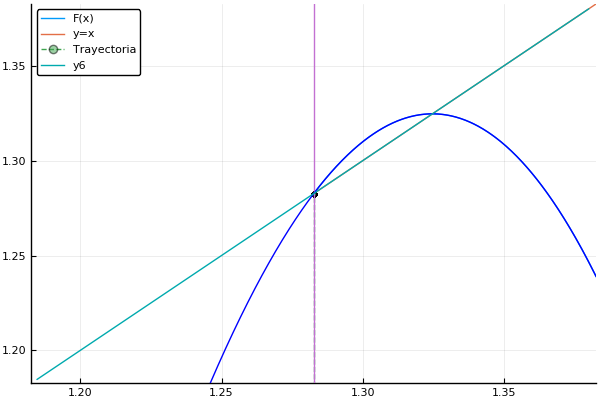
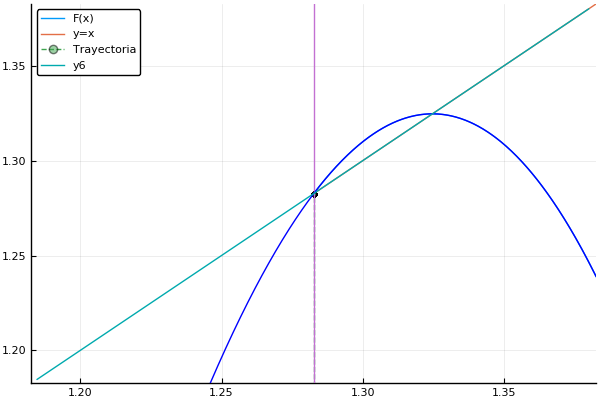

In [139]:
@manipulate for i in 1:length(mapeos)
    grafica_mapeo(mapeos[i], 1:100)
    xlims!(α-0.1, α+0.1)
    ylims!(α-0.1, α+0.1)
    vline!([α], label="")
    plot!(linspace(α-0.1, α+0.1, 1000), Q3c, c="blue", label="")
    plot!(x -> x, label="")
end

De esta grafica observamos que $\hat{\alpha}$ es aproximadamente

In [146]:
α̂_seed = mapeos[183].x₀

1.3646642737997625

Usemos el método de Newton para dar con un valor más exacto empleando este número aproximado como semilla.

In [147]:
α̂ = roots_newton(x -> Q3c(x) - α, α̂_seed)

1.3654770936237317

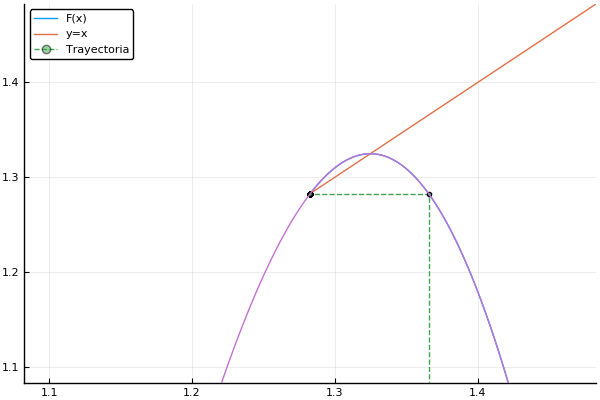

In [151]:
m = Mapeo(Q3c, α̂, 100)
grafica_mapeo(m, 1:100)
plot!(linspace(α-0.2, α+0.2, 1000), Q3c, label="")
xlims!(α-0.2, α+0.2); ylims!(α-0.2, α+0.2)

En efecto, es el punto que buscamos.

In [154]:
# Esto genera un gif, descomentar para regenerarlo
#mapeos = [Mapeo(Q3c, x0, 100) for x0 in α:1e-3:α̂]
#anim = @animate for i in 1:length(mapeos)
#    grafica_mapeo(mapeos[i], 1:100)
#    xlims!(α-0.1, α+0.1)
#    ylims!(α-0.1, α+0.1)
#    vline!([α], label="α")
#    vline!([α̂], label="α̂")
#    plot!(linspace(α-0.1, α+0.1, 1000), Q3c, c="blue", label="")
#    plot!(x -> x, label="")
#end

#gif(anim, "alpha.gif", fps=40)

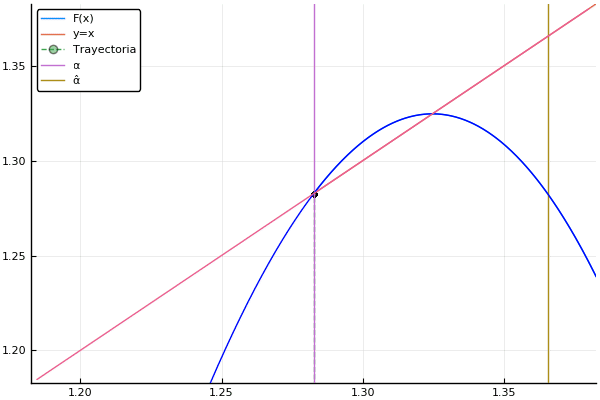

Se concluye que los puntos dentro del intervalo $[\alpha, \hat{\alpha}]$ convergen al punto estable correspondiente en este intervalo.